In [1]:
%matplotlib inline

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

# Training and Improving Neural Networks

## Demos


In [3]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(train_attributes, train_classes), (test_attributes, test_classes) = mnist.load_data()

In [5]:
train_attributes.shape

(60000, 28, 28)

In [52]:
train_attributes[0].max()

255

In [6]:
test_attributes.shape

(10000, 28, 28)

In [7]:
input_shape = train_attributes[0].shape
num_classes = len(set(train_classes))

In [8]:
input_shape

(28, 28)

In [9]:
set(train_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [55]:
tf.keras.backend.clear_session()

In [37]:
model = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(20, activation = "relu"),
    Dropout(0.9),
    Dense(num_classes, activation = "softmax")    
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 40)                31400     
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_9 (Dense)             (None, 30)                1230      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dropout_2 (Dropout)         (None, 20)               

In [38]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam")

In [40]:
model.fit(train_attributes, train_classes, validation_split = 0.1, epochs = 20, callbacks = [TensorBoard(update_freq = 10)])

Epoch 1/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.2892 - val_loss: 2.1735
Epoch 2/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.2961 - val_loss: 2.2595
Epoch 3/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.2943 - val_loss: 2.1870
Epoch 4/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.2923 - val_loss: 2.1702
Epoch 5/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.2900 - val_loss: 2.1761
Epoch 6/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.2886 - val_loss: 2.1529
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3100 - val_loss: 2.2484
Epoch 8/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3073 - val_loss: 2.1995
Epoch 9/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.2916 - val_loss: 2.1991
Epoch 10/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.289

In [31]:
model.layers[1].trainable = True

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 40)                31400     
                                                                 
 dropout_6 (Dropout)         (None, 40)                0         
                                                                 
 dense_17 (Dense)            (None, 30)                1230      
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_18 (Dense)            (None, 20)                620       
                                                                 
 dropout_8 (Dropout)         (None, 20)               

In [51]:
new_model = Sequential([
    Input(shape = (20, )),
    Dense(5),
    Dense(10),
    Dense(2)
])

In [45]:
new_model.layers

In [44]:
new_model.layers[0].kernel

<tf.Variable 'dense_6/kernel:0' shape=(20, 5) dtype=float32, numpy=
array([[-0.35889477, -0.01989549,  0.38536945,  0.09916547, -0.43800977],
       [ 0.48504266,  0.17269322,  0.3924792 ,  0.21836314,  0.10396591],
       [-0.05882964, -0.16373366,  0.01320806, -0.4692916 ,  0.29602405],
       [-0.48534027,  0.32204238, -0.4222294 , -0.43355337,  0.3818154 ],
       [-0.41999537,  0.4676014 ,  0.43538734, -0.38945103, -0.25495237],
       [ 0.38370362, -0.3725266 , -0.403718  ,  0.17131004,  0.43409893],
       [-0.2834248 , -0.2749559 , -0.04026309, -0.0884085 , -0.29326957],
       [ 0.11666712, -0.32574028, -0.08021   , -0.47773606, -0.22278544],
       [-0.16266984, -0.03941488,  0.36766502,  0.39826724, -0.33996978],
       [ 0.176348  , -0.25765747, -0.22228354, -0.20944339,  0.20894161],
       [-0.2923903 , -0.09100276,  0.28178522,  0.3903449 , -0.28344825],
       [-0.03517315, -0.45928037,  0.19593492, -0.27996433,  0.41311356],
       [ 0.33304724,  0.08626845,  0.0328100

In [47]:
new_model.layers[0].kernel.numpy().ravel()

array([-0.35889477, -0.01989549,  0.38536945,  0.09916547, -0.43800977,
        0.48504266,  0.17269322,  0.3924792 ,  0.21836314,  0.10396591,
       -0.05882964, -0.16373366,  0.01320806, -0.4692916 ,  0.29602405,
       -0.48534027,  0.32204238, -0.4222294 , -0.43355337,  0.3818154 ,
       -0.41999537,  0.4676014 ,  0.43538734, -0.38945103, -0.25495237,
        0.38370362, -0.3725266 , -0.403718  ,  0.17131004,  0.43409893,
       -0.2834248 , -0.2749559 , -0.04026309, -0.0884085 , -0.29326957,
        0.11666712, -0.32574028, -0.08021   , -0.47773606, -0.22278544,
       -0.16266984, -0.03941488,  0.36766502,  0.39826724, -0.33996978,
        0.176348  , -0.25765747, -0.22228354, -0.20944339,  0.20894161,
       -0.2923903 , -0.09100276,  0.28178522,  0.3903449 , -0.28344825,
       -0.03517315, -0.45928037,  0.19593492, -0.27996433,  0.41311356,
        0.33304724,  0.08626845,  0.03281006, -0.17883307, -0.20817694,
        0.4585146 ,  0.29365978,  0.3827525 , -0.27089462, -0.46

(array([ 6.,  3., 10., 12., 10.,  9.]),
 array([-0.6143625 , -0.41281766, -0.21127282, -0.00972798,  0.19181685,
         0.3933617 ,  0.5949065 ], dtype=float32),
 <BarContainer object of 6 artists>)

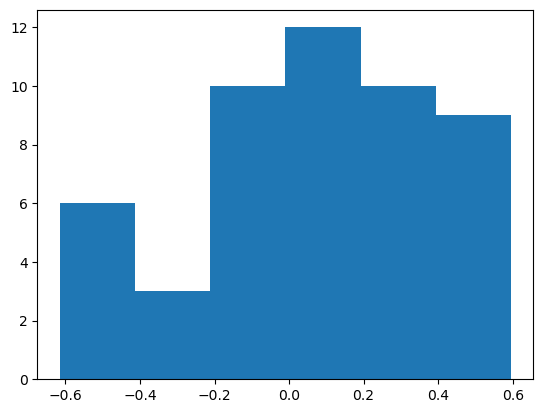

In [50]:
plt.hist(new_model.layers[1].kernel.numpy().ravel(), bins = "fd")

In [53]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate = 1))

In [54]:
model.fit(train_attributes, train_classes, validation_split = 0.1, epochs = 20, callbacks = [TensorBoard(update_freq = 10)])

Epoch 1/20
1688/1688 [==============================] - 3s 1ms/step - loss: 2.3078 - val_loss: 2.3088
Epoch 2/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3087 - val_loss: 2.3157
Epoch 3/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3087 - val_loss: 2.3048
Epoch 4/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3084 - val_loss: 2.3068
Epoch 5/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3086 - val_loss: 2.3234
Epoch 6/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3087 - val_loss: 2.3156
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3087 - val_loss: 2.3193
Epoch 8/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3091 - val_loss: 2.3101
Epoch 9/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3085 - val_loss: 2.3102
Epoch 10/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.309

In [58]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate = 10))

In [59]:
model.fit(train_attributes, train_classes, validation_split = 0.1, epochs = 20, callbacks = [TensorBoard(update_freq = 10)])

Epoch 1/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4702 - val_loss: 2.5556
Epoch 2/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4694 - val_loss: 2.5791
Epoch 3/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4739 - val_loss: 2.4511
Epoch 4/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4710 - val_loss: 2.6144
Epoch 5/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4720 - val_loss: 2.7858
Epoch 6/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4639 - val_loss: 2.4940
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4712 - val_loss: 2.6783
Epoch 8/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4710 - val_loss: 2.8939
Epoch 9/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4777 - val_loss: 2.5652
Epoch 10/20
1688/1688 [==============================] - 2s 1ms/step - loss: 2.467

In [61]:
model = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(20, activation = "relu"),
    Dropout(0.9),
    BatchNormalization(),
    Dense(num_classes, activation = "softmax")    
])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,990
Trainable params: 15,950
Non-trainable params: 40
___________________________________________________